In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.stats as stats
import scipy.linalg as linalg
from pprint import pprint

import matplotlib.gridspec as gridspec
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import sys
import os
import copy
import string
import glob
import xarray as xr 

import warnings

## Modules

In [5]:
from custom_functions import *
from example_funcs import Van_Duff

# Set parameters

In [6]:
# µ = 0.1,  α = 1,     β = 0, K = 0.5,  ω = 1         P
# µ = 0.1,  α = 1,     β = 0, K = 0.5,  ω = sqrt(2)   QP
# µ = 0.1,  α = 1,     β = 1, K = 0.5,  ω = 1         QP
# µ = 1.75, α = 1,     β = 0, K = 0.5,  ω = pi/5      QP
# µ = 1,    α = −1.44, β = 1, K = 0.45, ω = 1.2       Chaos

mu = 1 # nonlinear damping
alpha = -1.44 # stiffness
beta = 1 # nonlinearity
K = 0.45 # forcing strength
omega = 1.2 # frequency

p = np.array([mu,alpha,beta,K,omega])

# Solve IVP

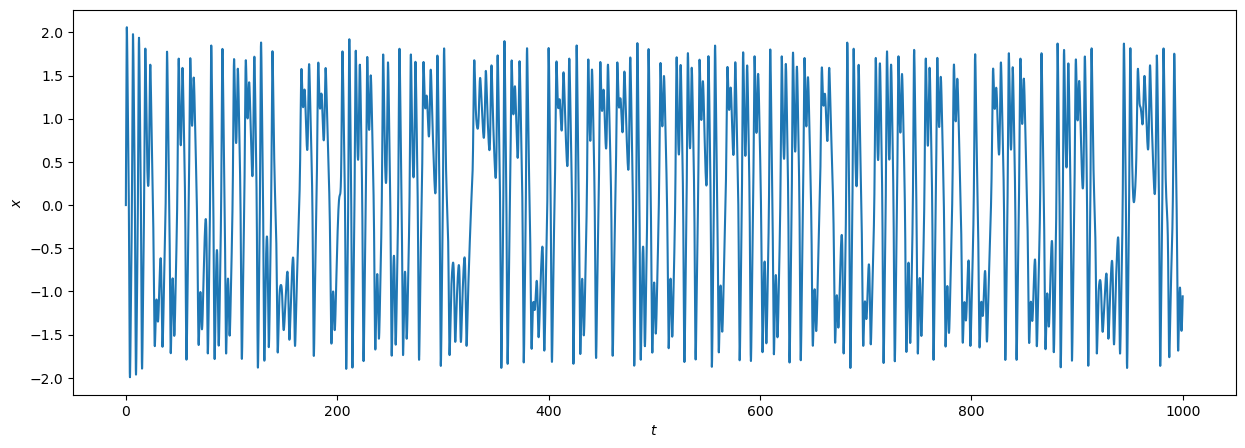

In [7]:
x1 = 0.
x2 = 2.
x3 = 0.

# Set up for initial value problem solver
x0 = np.array([x1,x2,x3])
tspan = [0,1000]
timescale = 2/omega*np.pi
h = 0.01*timescale

# Solve the ODE
[X,t,xeq1] = MyIVP(lambda t,x:Van_Duff(t,x,p),x0,tspan,h)

plt.figure(figsize=(15,5))
plt.plot(t,X[0,:].T)
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.show()

# Plot Poincare map

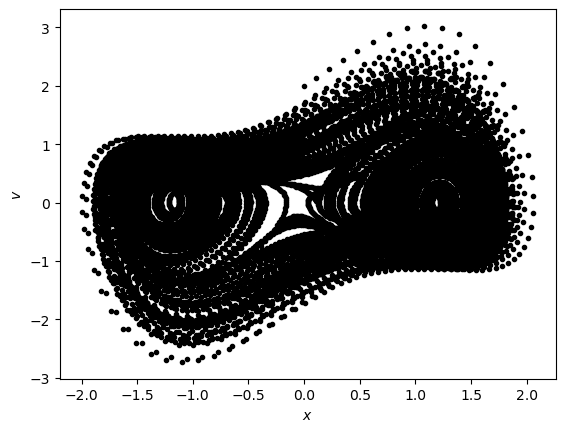

In [8]:
plt.plot(X[0,:],X[1,:],'k.')
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

# Plot 3D trajectory

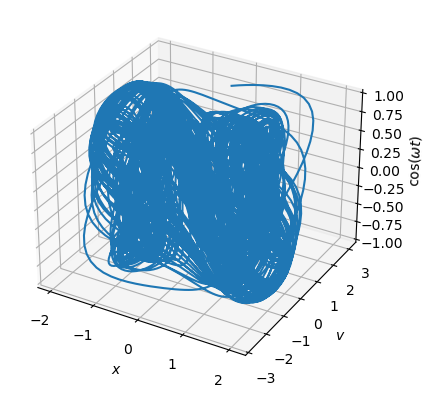

In [9]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.plot3D(np.squeeze(X[0,:]),np.squeeze(X[1,:]),np.squeeze(np.cos(X[2,:])))
ax.set_xlabel('$x$')
ax.set_ylabel('$v$')
ax.set_zlabel('$\\cos(\omega t)$')
plt.show()

# Calculate Lyapunov exponents

In [14]:
hjac = 1e-6
Js = MyJacobian(lambda x:Van_Duff(0,x,p),np.squeeze(X),hjac)
M = np.empty(np.shape(Js))*np.nan
for j in np.arange(0,np.shape(Js)[2]):
    M[:,:,j] = linalg.expm(Js[:,:,j]*h)

N = X.shape[2]

lams,Rdiag,Lambda,xout = LyapQR(M,x0,N,h=h)
print(lams)

C:\Users\quinncr\Documents\Python\KYA314\custom_functions.py:311: RuntimeWarning: divide by zero encountered in double_scalars
  Lambda[:,j] = 1/(j*h)*np.sum(np.log(Rdiag[:,:j+1]),axis=1)


[ 0.17343071 -0.40144905  0.        ]


# Calculate frequency spectrum

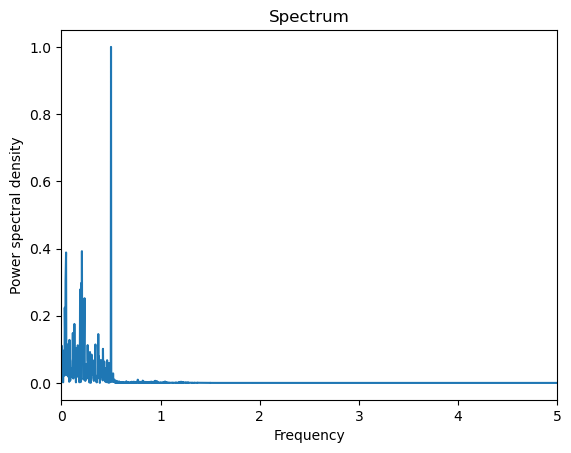

In [31]:
fs = 1/h;
xdft = scipy.fftpack.fft(X[0,:]);
xdft = xdft[:int((N+1)/2)];
psdx = (1/(fs*N)) * abs(xdft)**2;
psdx[1:] = 2*psdx[1:];
freq = np.linspace(0,fs/2+fs/N,N);

plt.plot(timescale*freq,(psdx/np.max(psdx)).T)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Power spectral density")
plt.xlim([0,5])
plt.show()